<a href="https://colab.research.google.com/github/cszafariqbal/Machine_Learning_Projects/blob/main/Annual_medical_price__Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:
ACME Insurance Inc. offers affordable health insurance to thousands of customer all over
the United States. As the lead data scientist at ACME, you're tasked with creating an automated system
to estimate the annual medical expenditure for new customers, using information such as their age,
sex, BMI, children, smoking habits and region of residence.



Download The Dataset

In [ ]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'


In [ ]:
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7918db433cd0>)

#import the datasets

In [ ]:
import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Exploratory Analysis and Visualization:**

--->Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.



In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following settings will improve the default style and font sizes for our charts.

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


Age

In [ ]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   nbins=47,
                   title='Distribution of BMI(Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x = 'age',
                   y='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   nbins=47,
                   title='Distribution of BMI(Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

### Charges

Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.



In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'red'],
                   title='Annual Medical Charges by Smokers')
fig.update_layout(bargap=0.1)
fig.show()


In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges By  Sex')
fig.update_layout(bargap=0.1)
fig.show()


In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'blue','red', 'aqua'],
                   title='Annual Medical Charges by region')
fig.update_layout(bargap=0.1)
fig.show()


### Smoker

Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [ ]:
fig = px.histogram(medical_df, x='smoker', color='sex', title='Smoker')
fig.show()

In [ ]:
fig = px.histogram(medical_df, x='sex', color='smoker', title='Smoker')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
fig = px.histogram(medical_df,x='smoker',y='children',color='smoker', title='Smoker')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,x='region',color='smoker', title='Smoker by region')
# fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


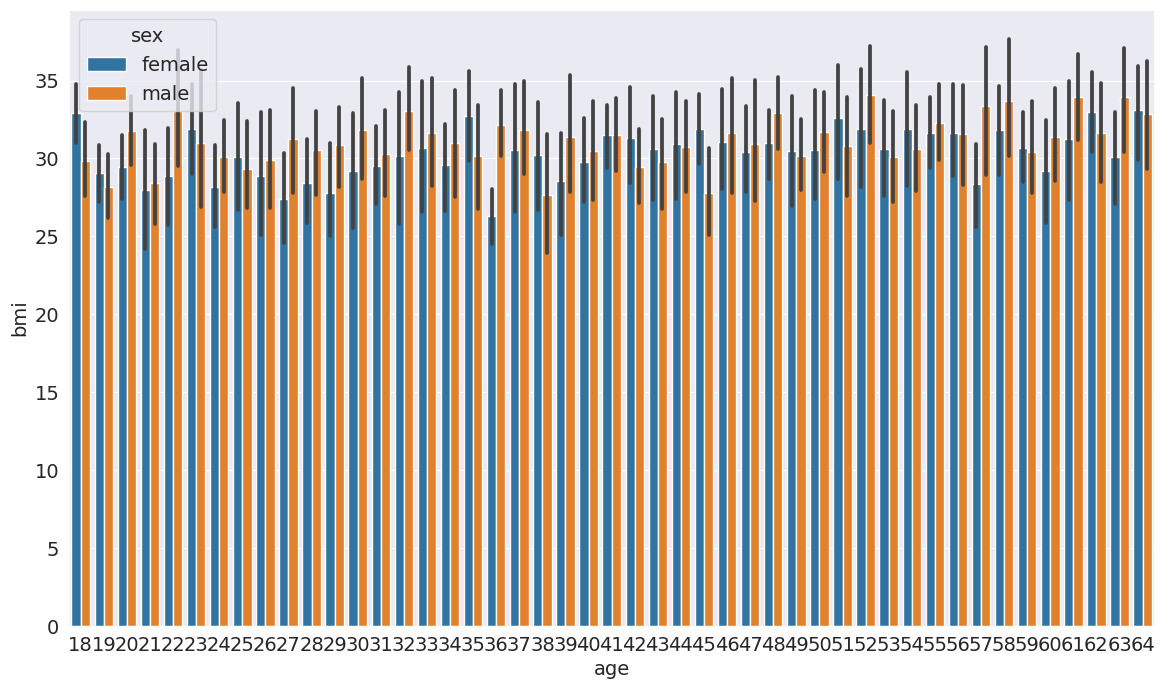

In [ ]:
import seaborn as sns
sns.barplot(x="age", y="bmi",hue="sex",data=medical_df)
plt.show()

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

**Age and Charges:**

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [ ]:
fig = px.scatter(medical_df, x='age', y='charges',color='smoker', opacity=0.9, title='Age vs. Charges')
fig.update_traces(marker_size=9)
fig.show()

**BMI and Charges:**

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [ ]:
fig = px.scatter(medical_df, x='bmi', y='charges', color='smoker', opacity=0.9, title='BMI VS Charges')
fig.update_traces(marker_size=9)
fig.show()



**Correlation**

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

In [ ]:
smoker_value = {"yes":1, "no":0}
smoker_numric = medical_df.smoker.map(smoker_value)
medical_df.charges.corr(smoker_numric)

0.787251430498478

In [ ]:
medical_df.corr()

<ipython-input-29-cf93875bab50>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-30-d7654b89a4f8>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



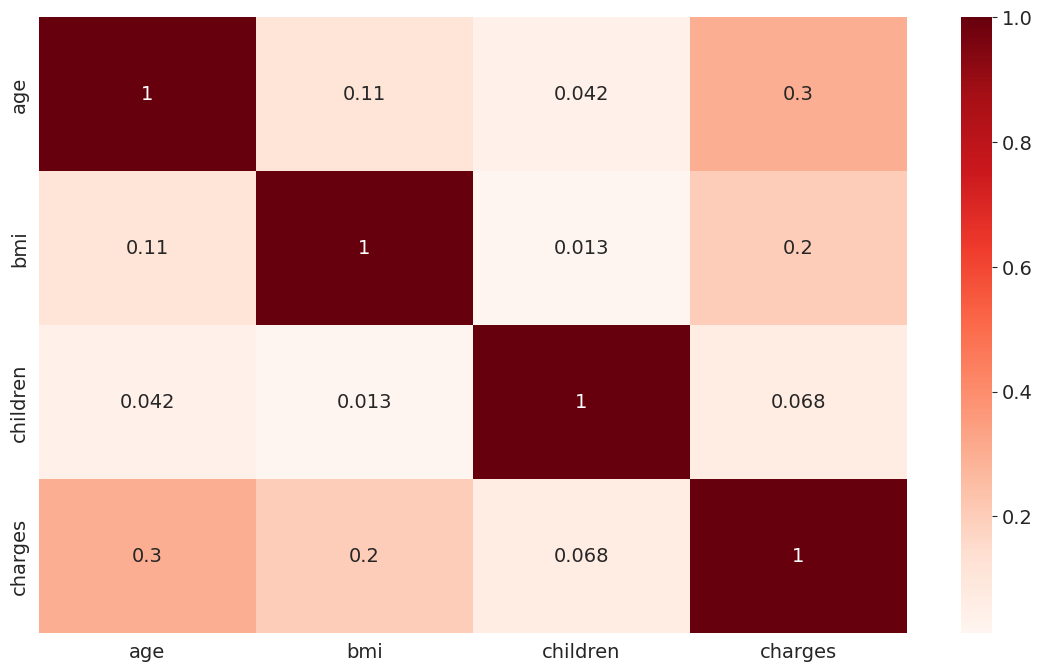

In [ ]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.show()

**Linear Regression using Scikit-learn**

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
model = LinearRegression()

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [ ]:
model.fit(inputs, targets)

LinearRegression()

In [ ]:
import numpy as np


In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))


In [ ]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


In [ ]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


As you can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [ ]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [ ]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can also visualize the relationship between all 3 variables "age", "bmi" and "charges" using a 3D scatter plot.

In [ ]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

You can see that it's harder to interpret a 3D scatter plot compared to a 2D scatter plot. As we add more features, it becomes impossible to visualize all feature at once, which is why we use measures like correlation and loss.

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
x = medical_df[medical_df.columns[:-1]]
y = medical_df['charges']

In [ ]:
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
x = pd.get_dummies(medical_df, columns=['sex', 'smoker'])
# type(x.sex_female[0])
x

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,0,1,1,0
1334,18,31.920,0,northeast,2205.98080,1,0,1,0
1335,18,36.850,0,southeast,1629.83350,1,0,1,0
1336,21,25.800,0,southwest,2007.94500,1,0,1,0


#Scaling of numerical columns

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
numerical_col = x.select_dtypes(include='number').columns.tolist()
categorical_col = x.select_dtypes(include='object').columns.tolist()

In [ ]:
scaler = StandardScaler()
scaler.fit(x[numerical_col])
x[numerical_col] = scaler.transform(x[numerical_col])

<ipython-input-49-81841f841e32>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
x[categorical_col]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


#one-hot encoding of categorical columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(x[categorical_col])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_col))
print(encoded_cols)

['sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']


In [ ]:
x[encoded_cols] = encoder.transform(x[categorical_col])

In [ ]:
x

,age,sex,bmi,children,smoker,region,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,female,-0.453320,-0.908614,yes,southwest,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,male,0.509621,-0.078767,no,southeast,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,male,0.383307,1.580926,no,southeast,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,male,-1.305531,-0.908614,no,northwest,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,male,-0.292556,-0.908614,no,northwest,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,male,0.050297,1.580926,no,northwest,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,-1.509965,female,0.206139,-0.908614,no,northeast,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,-1.509965,female,1.014878,-0.908614,no,southeast,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,-1.296362,female,-0.797813,-0.908614,no,southwest,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
input_data = x.select_dtypes(include='number')
input_data = input_data[input_data.columns[:7]]
input_data

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
0,-1.438764,-0.453320,-0.908614,1.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,0.0,1.0,1.0,0.0
2,-0.797954,0.383307,1.580926,0.0,1.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0.0,1.0,1.0,0.0
4,-0.513149,-0.292556,-0.908614,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,0.0,1.0,1.0,0.0
1334,-1.509965,0.206139,-0.908614,1.0,0.0,1.0,0.0
1335,-1.509965,1.014878,-0.908614,1.0,0.0,1.0,0.0
1336,-1.296362,-0.797813,-0.908614,1.0,0.0,1.0,0.0


#train and test split of datasets

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, y, test_size = 0.2, random_state = 42)


#Linear reggression model




In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt


# Create and train the model
model = LinearRegression().fit(x_train, y_train)

# Generate predictions
predictions = model.predict(x_test)

# Compute loss to evalute the model
loss = sqrt(mean_squared_error(y_test, predictions))
print('Loss:', loss)

Loss: 5829.17293025419


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,predictions)
print('r2 score:', r2)

r2 score: 0.7811302113434095


In [ ]:
# Generate predictions
predictions = model.predict(x_train)

# Compute loss to evalute the model
loss = sqrt(mean_squared_error(y_train, predictions))
print('Loss:', loss)

Loss: 6113.06655740958


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train,predictions)
print('r2 score:', r2)

r2 score: 0.7410888590280913


In [ ]:
medical_df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
val = [2, 5, 'male', 'female', 77, 'no', 'yes']
for i in range(len(val)):
  if val[i] == 'male' or val[i] == 'yes':
    val[i] = 1

  if val[i] == 'female' or  val[i] == 'no':
      val[i] = 0



val



[2, 5, 1, 0, 77, 0, 1]

# RandomForestRegressor MOdel

In [ ]:
# Random forest Regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, random_state=5)
model.fit(x_train, y_train)
predictions_train = model.predict(x_train)
print("Train mean_sqr_root_error: {0:.2f}".format(sqrt(mean_squared_error(y_train, predictions_train))))
predictions_test = model.predict(x_test)
print("Test mean_sqr_root_error: {0:.2f}".format(sqrt(mean_squared_error(y_test, predictions_test))))

Train mean_sqr_root_error: 1914.25
Test mean_sqr_root_error: 4662.40


#Tunning Hyperparameters

In [ ]:
estimators = [100,200,300]
depth = list(range(1,10))
error = []
params = []

for estimator in estimators:
  for max_depth in depth:
    rfc = RandomForestRegressor(n_estimators=estimator, max_depth=max_depth)
    rfc.fit(x_train, y_train)
    preds = rfc.predict(x_test)

    error.append(sqrt(mean_squared_error(y_test, preds)))
    params.append([estimator, max_depth])

In [ ]:
model_parameters = pd.DataFrame({'Rms_Error':error,'params':params})
model_parameters

,Rms_Error,params
0,7263.005631,"[100, 1]"
1,4944.197998,"[100, 2]"
2,4568.962100,"[100, 3]"
3,4434.712675,"[100, 4]"
4,4475.667187,"[100, 5]"
5,4452.836368,"[100, 6]"
6,4521.645691,"[100, 7]"
7,4562.189968,"[100, 8]"
8,4613.000190,"[100, 9]"
9,7259.869237,"[200, 1]"


#Plot residual and prediction value

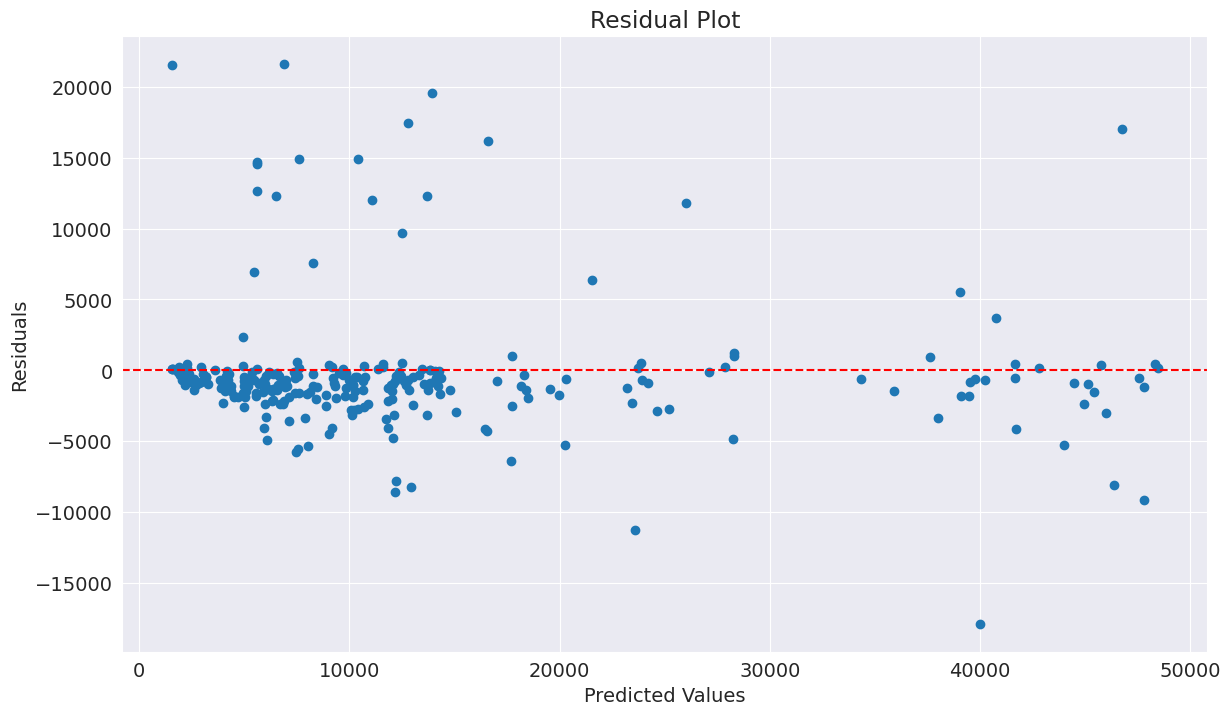

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - preds
plt.scatter(preds, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300, max_depth=5, random_state=5)
model.fit(x_train, y_train)
predictions_train = model.predict(x_train)
print("Train mean_sqr_root_error: {0:.2f}".format(sqrt(mean_squared_error(y_train, predictions_train))))
predictions_test = model.predict(x_test)
print("Test mean_sqr_root_error: {0:.2f}".format(sqrt(mean_squared_error(y_test, predictions_test))))

Train mean_sqr_root_error: 4078.68
Test mean_sqr_root_error: 4418.95


In [ ]:
r2 = r2_score(y_train,predictions_train)
print('r2 score:', r2)

r2 score: 0.8847418326091788


In [ ]:
r2 = r2_score(y_test,predictions_test)
print('r2 score:', r2)

r2 score: 0.8742206257713226


#save the model

In [ ]:
import joblib

#Save the model using joblib
model_filename = 'Linear_model.joblib'
joblib.dump(model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as Linear_model.joblib


#save Scaler

In [ ]:
import joblib
import sklearn

joblib.dump(scaler, 'scaler.save')